In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
# import pandasql as psql

# Set to display all the columns of the dataset
# pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ds = pd.read_csv('/content/drive/MyDrive/IBM/Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [ ]:
ds.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
ds.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
ds.shape

(1000, 2)

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
ds.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [ ]:
ds.Liked.describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

In [ ]:
ds['length']=ds.Review.apply(len)
ds.head()

,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [ ]:
ds[ds.length==70]['Review'].iloc[0]

"I'm probably one of the few people to ever go to Ians and not like it."

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [ ]:
def text_process(msg):
  nopunc =[char for char in msg if char not in string.punctuation]
  nopunc=''.join(nopunc)
  return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [ ]:
ds['tokenized_Review']=ds['Review'].apply(text_process)

In [ ]:
ds.head()

,Review,Liked,length,tokenized_Review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust good
2,Not tasty and the texture was just nasty.,0,41,tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


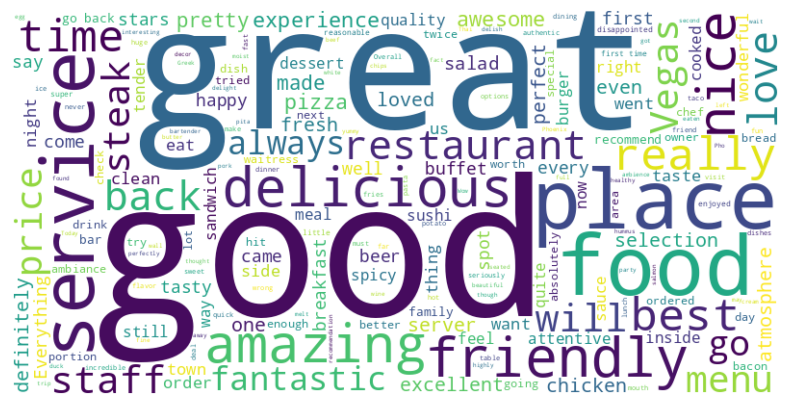

In [ ]:
# Positive Review
from wordcloud import WordCloud
word_cloud = ds.loc[ds.Liked == 1,:]
text=' '.join([text for text in word_cloud ['Review']])
# Generate a WordCloud object
wordcloud = WordCloud (width=800, height=400, background_color='white').generate(text)
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

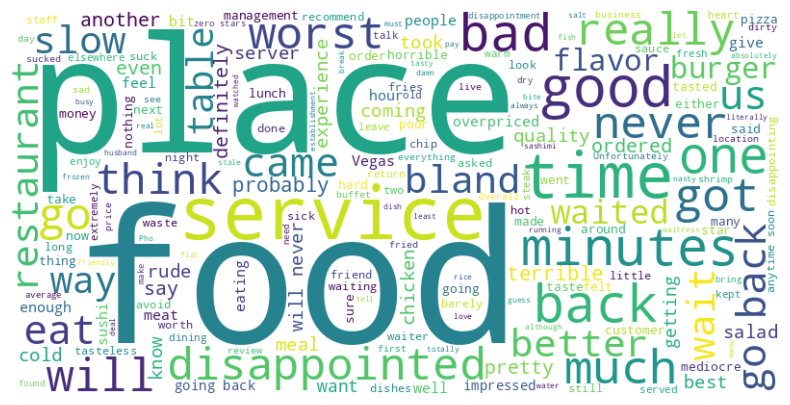

In [ ]:
# Negative Review
from wordcloud import WordCloud
word_cloud = ds.loc[ds.Liked== 0,:]
text=' '.join([text for text in word_cloud ['Review']])
# Generate a WordCloud object
wordcloud = WordCloud (width=800, height=400, background_color='white').generate(text)
# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = CountVectorizer(max_df=0.9,min_df=10)
X = vectorizer.fit_transform(ds.tokenized_Review).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
x=ds.tokenized_Review
y=ds.Liked

In [ ]:
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 107, test_size=0.2)

In [ ]:
x_train.head()

675                        fantastic neighborhood gem
561                               two felt disgusting
535    excellent new restaurant experienced Frenchman
266                                service par either
199                                       worth drive
Name: tokenized_Review, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(x_train)
test_vectorized = vectorizer.transform(x_test)

In [ ]:
x_train_array = train_vectorized.toarray()
x_test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train_array, y_train)

GaussianNB()

In [ ]:
y_train_preds_nb = nb.predict(x_train_array)
y_test_preds_nb = nb.predict(x_test_array)
y_test_preds_nb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
y_test

906    0
24     1
706    1
958    0
355    1
      ..
657    1
754    0
839    1
495    0
804    1
Name: Liked, Length: 200, dtype: int64

In [ ]:
pd.DataFrame({"actual":y_test, "predicted":y_test_preds_nb})

,actual,predicted
906,0,0
24,1,0
706,1,1
958,0,0
355,1,1
...,...,...
657,1,1
754,0,0
839,1,0
495,0,0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
def print_metrics(actual,predicted):
  print('Accuracy Score : {}'.format(accuracy_score(actual, predicted)))
  print('Precision Score : {}'.format(precision_score(actual, predicted)))
  print('Recall Score : {}'.format(recall_score(actual, predicted)))
  print('f1 Score : {}'.format(f1_score(actual, predicted)))
  print('roc_auc Score : {}'.format(roc_auc_score(actual, predicted)))
  print('Confusion Matrix : {}'.format(confusion_matrix(actual, predicted)))
  print('Classification Report : {}'.format(classification_report(actual, predicted)))

In [ ]:
print_metrics(y_train, y_train_preds_nb)

Accuracy Score : 0.76375
Precision Score : 0.8403908794788274
Recall Score : 0.6482412060301508
f1 Score : 0.7319148936170213
roc_auc Score : 0.7631753293832346
Confusion Matrix : [[353  49]
 [140 258]]
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.88      0.79       402
           1       0.84      0.65      0.73       398

    accuracy                           0.76       800
   macro avg       0.78      0.76      0.76       800
weighted avg       0.78      0.76      0.76       800



In [ ]:
print_metrics(y_test, y_test_preds_nb)

Accuracy Score : 0.725
Precision Score : 0.8133333333333334
Recall Score : 0.5980392156862745
f1 Score : 0.6892655367231638
roc_auc Score : 0.7275910364145659
Confusion Matrix : [[84 14]
 [41 61]]
Classification Report :               precision    recall  f1-score   support

           0       0.67      0.86      0.75        98
           1       0.81      0.60      0.69       102

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.74      0.72      0.72       200



In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train_array, y_train)

MultinomialNB()

In [ ]:
y_train_preds_mnb = mnb.predict(x_train_array)
y_test_preds_mnb = mnb.predict(x_test_array)
y_test_preds_mnb

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [ ]:
print_metrics(y_train, y_train_preds_mnb)

Accuracy Score : 0.77
Precision Score : 0.8092485549132948
Recall Score : 0.7035175879396985
f1 Score : 0.7526881720430108
roc_auc Score : 0.7696692417310432
Confusion Matrix : [[336  66]
 [118 280]]
Classification Report :               precision    recall  f1-score   support

           0       0.74      0.84      0.79       402
           1       0.81      0.70      0.75       398

    accuracy                           0.77       800
   macro avg       0.77      0.77      0.77       800
weighted avg       0.77      0.77      0.77       800



In [ ]:
print_metrics(y_test, y_test_preds_mnb)

Accuracy Score : 0.745
Precision Score : 0.7802197802197802
Recall Score : 0.696078431372549
f1 Score : 0.7357512953367875
roc_auc Score : 0.7459983993597439
Confusion Matrix : [[78 20]
 [31 71]]
Classification Report :               precision    recall  f1-score   support

           0       0.72      0.80      0.75        98
           1       0.78      0.70      0.74       102

    accuracy                           0.74       200
   macro avg       0.75      0.75      0.74       200
weighted avg       0.75      0.74      0.74       200



In [ ]:
# Hyper parameter tuning
best_accuracy=0.0
alpha_val=0


for i in np.arange(0.01,1.1,0.1):
  temp_cls=MultinomialNB(alpha=i)
  temp_cls.fit(x_train_array, y_train)
  y_test_pred_h_nbayes = temp_cls.predict(x_test_array)
  score=accuracy_score(y_test, y_test_pred_h_nbayes)
  print("accuracy score for alpha-{} is :{}".format(round(i, 1), round(score*100,2)))
  if score>best_accuracy:
               best_accuracy=score
               alpha_val=i
print(".................................")
print("the best accuracy is {}% with alpha value as {}".format(round(best_accuracy*100,2), round(alpha_val,1)))

accuracy score for alpha-0.0 is :75.5
accuracy score for alpha-0.1 is :75.5
accuracy score for alpha-0.2 is :75.0
accuracy score for alpha-0.3 is :74.0
accuracy score for alpha-0.4 is :74.5
accuracy score for alpha-0.5 is :74.5
accuracy score for alpha-0.6 is :74.5
accuracy score for alpha-0.7 is :74.5
accuracy score for alpha-0.8 is :74.5
accuracy score for alpha-0.9 is :74.5
accuracy score for alpha-1.0 is :74.5
.................................
the best accuracy is 75.5% with alpha value as 0.0
